In [1]:
# setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

In [20]:
print(tf.__version__)

2.7.0


In [2]:
# one hot encoding
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]


In [3]:
# One cell RNN input_dim (4) -> output_dim (2)
# sequence length= 1 data , 배치 사이즈 1
x_data = np.array([[h]], dtype=np.float32)

# 3 batches 'hello', 'eolll', 'lleel'  : 배치 사이즈 3
# sequence length :  나열할 RNN의 개수



hidden_size = 2  #출력의 크기를 결정


# use Simple RNN Cell api
cell = layers.SimpleRNNCell(units=hidden_size) # creating SimpleRNNCell
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # analogous to tf.nn.dynamic_rnn

# outputs: ht 값 , states :영향을줄 states값

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.31748667 -0.7061546 ]]], shape: (1, 1, 2)
states: [[-0.31748667 -0.7061546 ]], shape: (1, 2)


In [4]:

# equivalent to above case
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,return_state=True) 
# layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[0.24443673 0.5679545 ]]], shape: (1, 1, 2)
states: [[0.24443673 0.5679545 ]], shape: (1, 2)


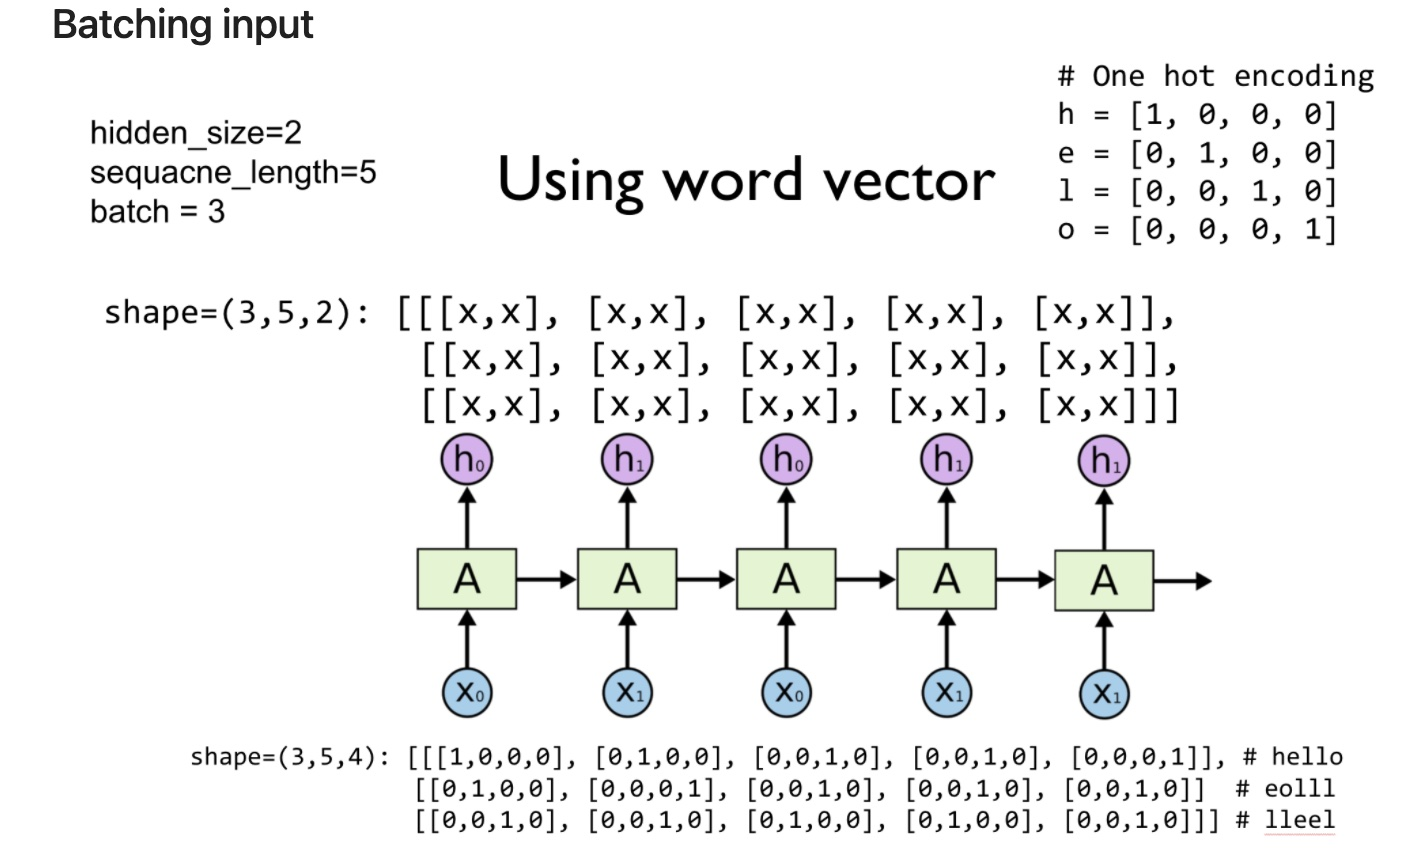

In [8]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
# data 저처리
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)


hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.68481493 -0.03722091]
  [ 0.1875708   0.28499046]
  [-0.25253913  0.26731566]
  [ 0.17880823  0.23225859]
  [-0.43289647 -0.37005278]]], shape: (1, 5, 2) 

states: [[-0.43289647 -0.37005278]], shape: (1, 2)


In [7]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.19573627  0.50633514]
  [ 0.1014061   0.61080617]
  [ 0.12325107 -0.7713818 ]
  [-0.8150308  -0.43654627]
  [-0.61115944 -0.43621355]]

 [[-0.4143624   0.6206024 ]
  [ 0.39612246 -0.46827665]
  [-0.6391108  -0.32199305]
  [-0.771085   -0.87284315]
  [-0.9189056  -0.84914714]]

 [[-0.44503605 -0.7066738 ]
  [-0.8623423  -0.76860577]
  [-0.9021391   0.22496893]
  [-0.5249015  -0.19048604]
  [-0.69497174 -0.8592768 ]]], shape: (3, 5, 2) 

states: [[-0.61115944 -0.43621355]
 [-0.9189056  -0.84914714]
 [-0.69497174 -0.8592768 ]], shape: (3, 2)


### word sentiment classification

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [10]:
# example data
words = ['good', 'bad', 'worse', 'so good']
y_data = [1,0,0,1] #감정을 긍부정을 넣어준다

# creating a token dictionary  -> 매핑을 위하여

char_set = ['<pad>'] + sorted(list(set(''.join(words))))
# data 의 길이를 맞추기 위해 대입

idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [11]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [12]:
# padding the sequence of indices
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


In [19]:
# creating simple rnn for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           trainable=False, mask_zero=True, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))

#mask_zero=true  , 0값 패딩 부분 연산시 건너 뜀
#trainable = false : One hot vector train skip 

model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 11)            121       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [21]:
# creating loss function
def loss_fn(model, x, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True))

# creating an optimizer
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size = batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [15]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:        
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.036
epoch :  10, tr_loss : 0.007
epoch :  15, tr_loss : 0.003
epoch :  20, tr_loss : 0.002
epoch :  25, tr_loss : 0.002
epoch :  30, tr_loss : 0.001


acc : 100.00%


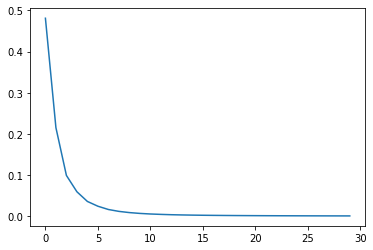

In [18]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))
plt.plot(tr_loss_hist)

### Sentence sentiment classification

In [23]:
# example data
sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1,0,0,1] # 1: richard feynman, 0: albert einstein



# creating a token dictionary  -> 전처리
char_set = ['<pad>'] + sorted(list(set(''.join(sentences))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

# converting sequence of tokens to sequence of indices
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

# padding the sequence of indices
max_sequence = 55
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)


['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}
[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
  12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 2

In [26]:
# creating stacked rnn for "many to one" classification with dropout
num_classes = 2
hidden_dims = [10,10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           trainable=False, mask_zero=True, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))


#layer1
model.add(layers.SimpleRNN(units=hidden_dims[0], return_sequences=True))
# return_sequences : [data_dim,input_sequence,output_dim]  # 다음 Rnn 의 데이터를 받기좋게만듬
model.add(layers.TimeDistributed(layers.Dropout(rate = .2)))
# stacked Rnn model capacity >> shallow one  so could be overfitting

#layer2
model.add(layers.SimpleRNN(units=hidden_dims[1]))
model.add(layers.Dropout(rate = .2))


model.add(layers.Dense(units=num_classes))

In [27]:
# creating loss function
def loss_fn(model, x, y, training):    
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x, training), from_logits=True))

# creating and optimizer
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)


# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 55), (None,)), types: (tf.int32, tf.int32)>


In [28]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.030
epoch :  10, tr_loss : 0.008
epoch :  15, tr_loss : 0.011
epoch :  20, tr_loss : 0.003
epoch :  25, tr_loss : 0.001
epoch :  30, tr_loss : 0.003


### many to many simple pos-tagger 

In [29]:
# example data
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [30]:
# creating a token dictionary for word
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [31]:
# creating a token dictionary for part of speech
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


In [32]:
# converting sequence of tokens to sequence of indices
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

# padding the sequence of indices
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

# checking data
print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


### seq to seq 